## ASSIGNMENT_AUSTRALIA_ANALYSIS_PART1

In [32]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### IMPORTING FLIGHT DATA

In [33]:

Flight_Data = pd.read_csv(r"C:\Users\Avishaek\Downloads\Sorted Data\AUSTRALIA_FLIGHT_DATA.csv")

In [34]:
Flight_Data.columns
Edge_List = Flight_Data

#### Merging Of Parallel Edges (Weights) and Adding-Up their Respective weights

In [ ]:

Edge_List=Edge_List.groupby(['Source','Target']).sum('Weight').reset_index()

Edge_List

#### Using NetworkX to create a Directed Graph

In [6]:
Graph=nx.from_pandas_edgelist(Edge_List, source= 'Source', target='Target', edge_attr='Weight', create_using=nx.DiGraph)

Total_Nodes= Graph.nodes()
Total_Nodes= pd.DataFrame(Total_Nodes)

Nodes_United_Kingdom = pd.DataFrame(columns = ['id','label','country','Latitude','Longitude'])
Nodes_United_Kingdom['id'] = Total_Nodes
len(Graph.nodes())

156

In [ ]:
nx. info(Graph)  # gives Information about number of Nodes and Edges


Graph.nodes()  # To see the Nodes

#### IMPORTING DATA FROM AIRPORT DATA FRAME

In [7]:

Airport_Data= pd.read_csv(r"C:\Users\Avishaek\Downloads\Sorted Data\AUSTRALIA_AIRPORT_DATA.csv")

for i, row in Nodes_United_Kingdom.iterrows():
    for j, row in Airport_Data.iterrows():
        
         if Nodes_United_Kingdom.loc[i].at["id"]== Airport_Data.loc[j].at["id"]:
            Nodes_United_Kingdom.loc[i].at["label"] = Airport_Data.loc[j].at["label"] 
            Nodes_United_Kingdom.loc[i].at["country"] = Airport_Data.loc[j].at["country"]
            Nodes_United_Kingdom.loc[i].at["Latitude"] = Airport_Data.loc[j].at["Lat "]
            Nodes_United_Kingdom.loc[i].at["Longitude"] = Airport_Data.loc[j].at["Lon"]
            break

            
Nodes_United_Kingdom.to_csv('C:\Users\Avishaek\Downloads\Sorted Data\Nodes_Australia.csv') 


#### PLOTTING OF GRAPH--AIRPORT NETWORK

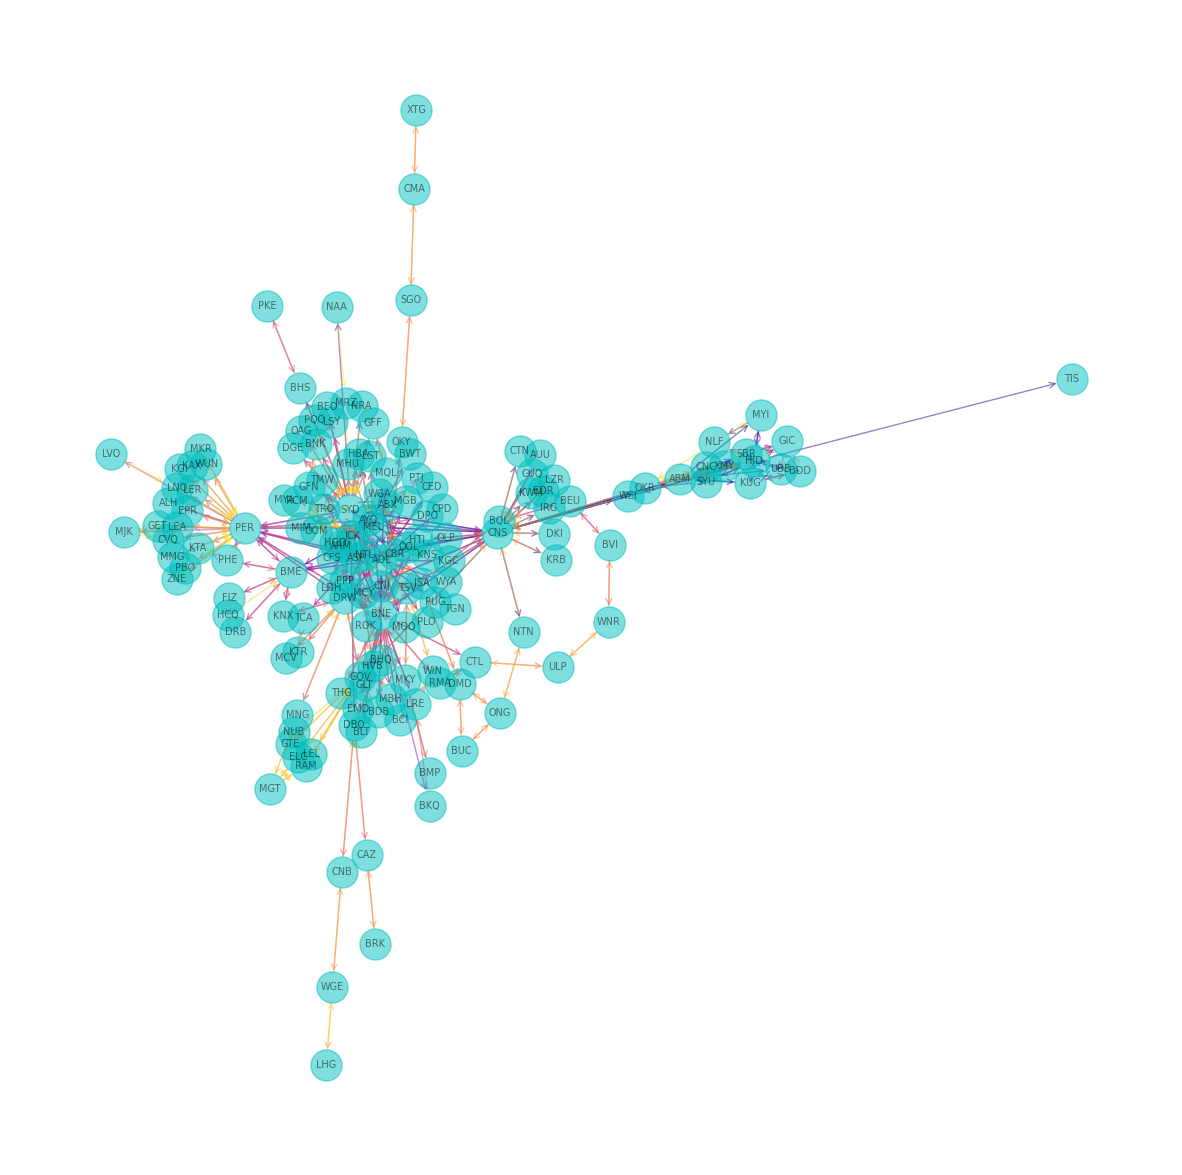

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

M = Graph.number_of_edges()
edge_colors = range(2, M + 2)
cmap = plt.cm.plasma

nx.draw_networkx(Graph, ax=ax, with_labels= True, node_size=500,  arrowstyle="->", arrowsize=10, edge_color=edge_colors, edge_cmap=cmap, node_color='c', font_size=7, alpha=0.5, width=1)
ax.set_axis_off()


#### ANALYSIS OF NETWORK

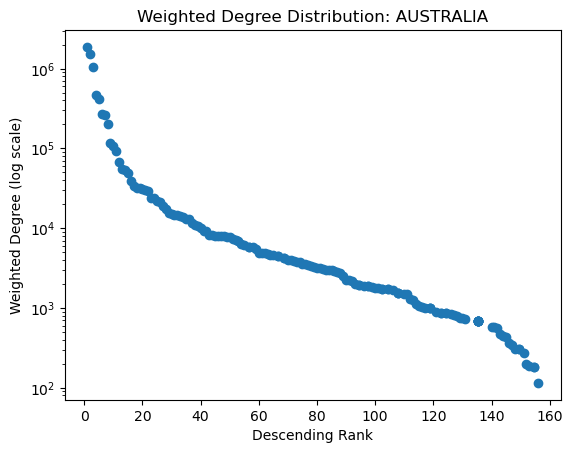

In [42]:
# DEGREE DISTRIBUTION

deg = Graph.degree(weight ='Weight')
deg_axis = sorted([d for n, d in deg], reverse=True)
rank_axis = pd.DataFrame(deg_axis).rank(ascending = False).values

plt.title('Weighted Degree Distribution: AUSTRALIA')
plt.xlabel("Descending Rank")
plt.ylabel( 'Weighted Degree (log scale)')
plt.xscale("linear")
plt.yscale("log")

plt.plot(rank_axis,deg_axis,'o')
plt.savefig('UK_Degree_Distribution.png')



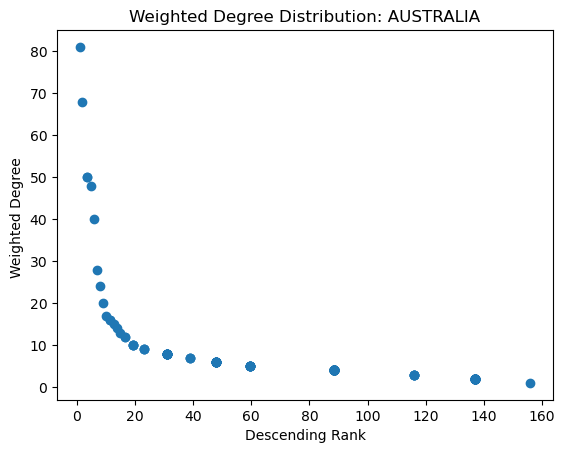

In [40]:
Deg = Graph.degree
Deg_axis = sorted([d for n, d in Deg], reverse=True)
Rank_axis = pd.DataFrame(Deg_axis).rank(ascending = False).values

plt.title('Weighted Degree Distribution: AUSTRALIA')
plt.xlabel("Descending Rank")
plt.ylabel( 'Weighted Degree ')

plt.plot(Rank_axis,Deg_axis,'o')

In [ ]:
##Most Influential
most_influential= nx.betweenness_centrality(Graph)
most_influential
most_influential=dict(sorted(most_influential.items(), reverse=True, key=lambda item: item[1]))
for w in sorted(most_influential, key= most_influential.get, reverse=True):
    print(w, most_influential[w])

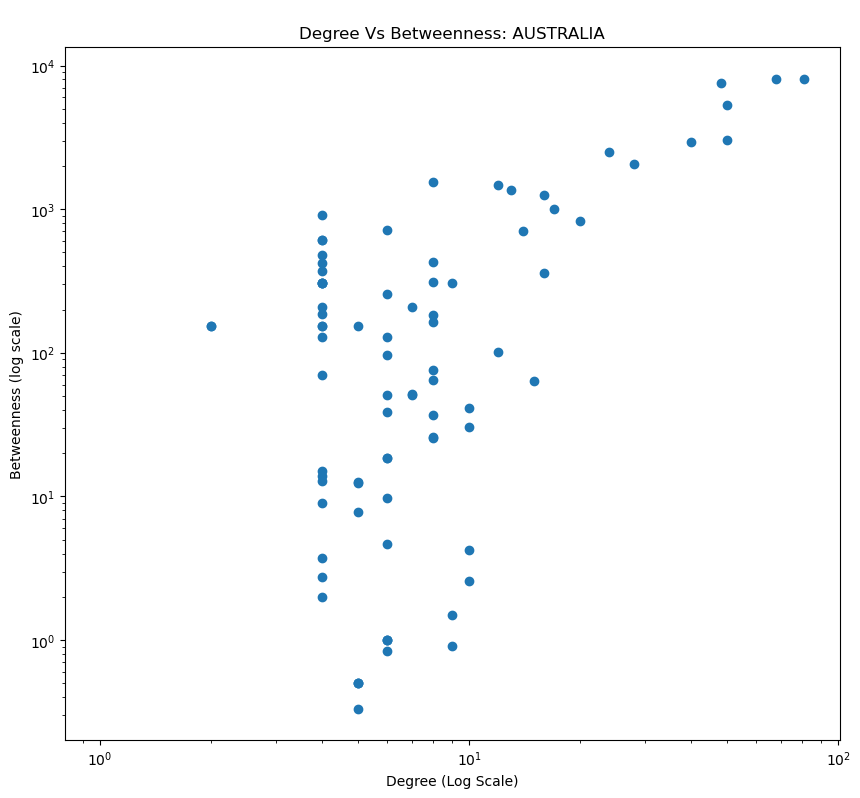

In [43]:
# DEGREE VS BETWEENNESS DISTRIBUTION


deg_axis = [val for (node, val) in sorted(Graph.degree, key=lambda x: x[0], reverse=False)]
bet = list(nx.betweenness_centrality(Graph,endpoints = False, normalized=False).items())
bet_axis = [val for (node, val) in sorted(bet, key=lambda x: x[0], reverse=False)]
plt.figure(figsize = (10,9))
plt.title('\nDegree Vs Betweenness: AUSTRALIA')
plt.xlabel('Degree (Log Scale)')
plt.ylabel('Betweenness (log scale)')
plt.xscale("log")
plt.yscale("log")
# pLt.savefig( 'UK_DegreeVsBetweenness. png ')
plt.plot(deg_axis ,bet_axis,'o')
plt.savefig( 'UK_DegreeVsBetweenness.png' )

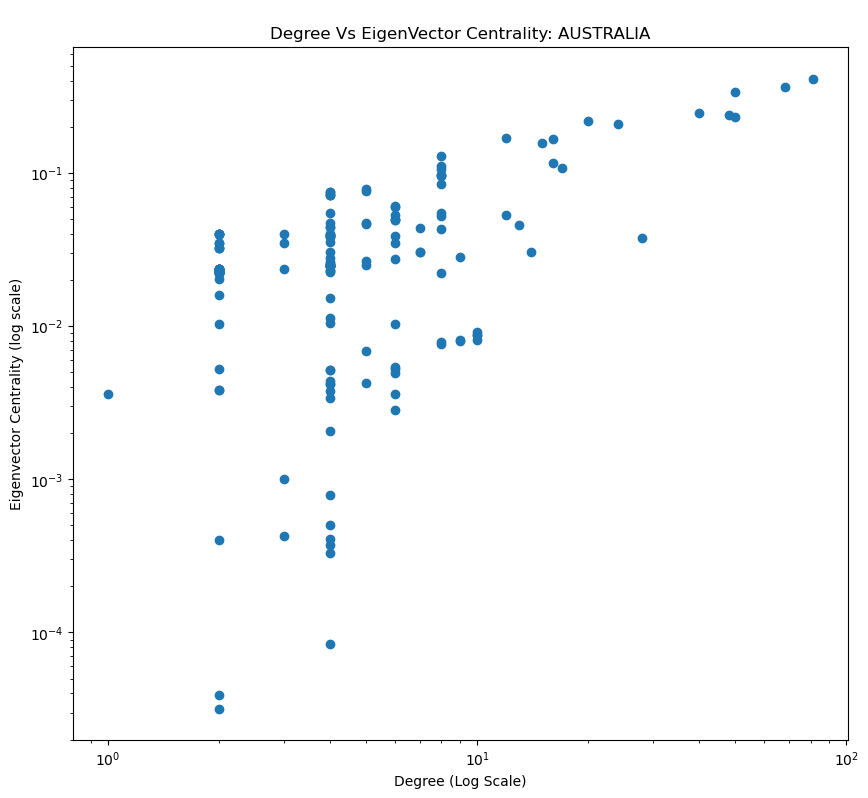

In [47]:
# DEGREE VS Eigenvector Centrality(log scale)


deg_axis = [val for (node, val) in sorted(Graph.degree, key=lambda x: x[0], reverse=False)]
EC = list(nx.eigenvector_centrality(Graph).items())
EVC_axis = [val for (node, val) in sorted(EC, key=lambda x: x[0], reverse=False)]
plt.figure(figsize = (10,9))
plt.title('\nDegree Vs EigenVector Centrality: AUSTRALIA')
plt.xlabel('Degree (Log Scale)')
plt.ylabel('Eigenvector Centrality (log scale)')
plt.xscale("log")
plt.yscale("log")
# pLt.savefig( 'UK_DegreeVsBetweenness. png ')
plt.plot(deg_axis ,EVC_axis,'o')

In [17]:
##Association
nx.clustering(Graph)
nx.degree_assortativity_coefficient(Graph)

-0.22539512649637627

In [18]:
# ASSORTATIIVITY (DEG PEARSON CORR COEFF)
nx.degree_pearson_correlation_coefficient(Graph)

-0.22539512649637655

#### PLOTTING ASSORTATIVITY (DEG VS AVG NEIGHBOURS DEG)

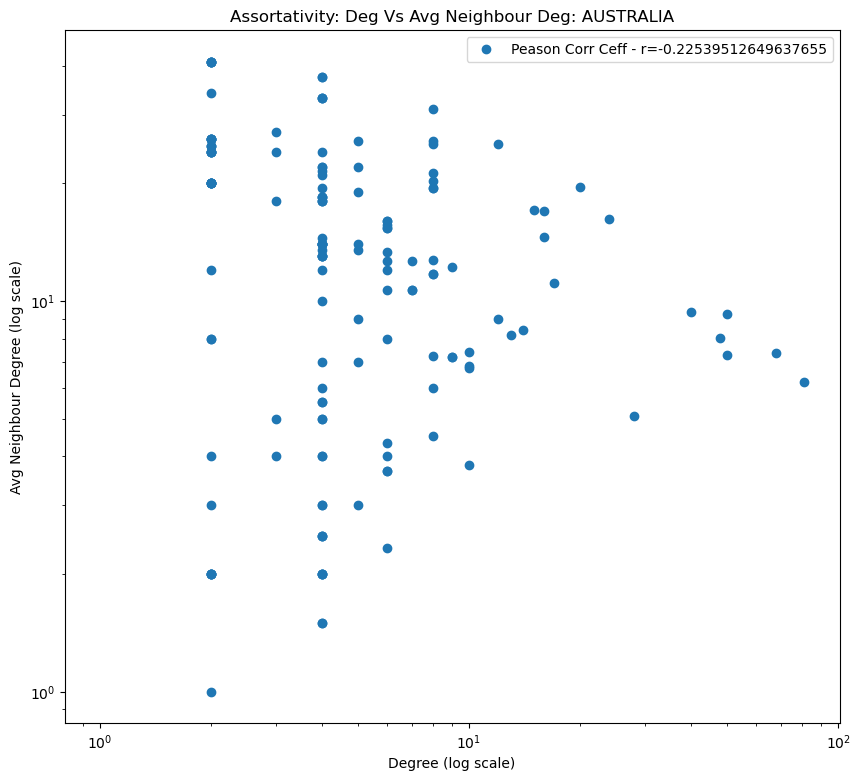

In [44]:
deg_axis = [val for (node, val) in sorted(Graph.degree, key=lambda x: x[0], reverse=False)]
avg_ngbr_deg = list(nx.average_neighbor_degree(Graph).items())
avg_ngbr_axis = [val for (node, val) in sorted(avg_ngbr_deg, key=lambda x: x[0], reverse=False)]

plt.figure(figsize = (10,9))
plt.plot(deg_axis, avg_ngbr_axis, 'o')
plt.title('Assortativity: Deg Vs Avg Neighbour Deg: AUSTRALIA')
plt.xlabel('Degree (log scale)')
plt.ylabel( 'Avg Neighbour Degree (log scale)')
plt.legend(['Peason Corr Ceff - r=-0.22539512649637655'])
plt.xscale("log")
plt.yscale("log")

#### LARGEST CONNECTED COMPONENT

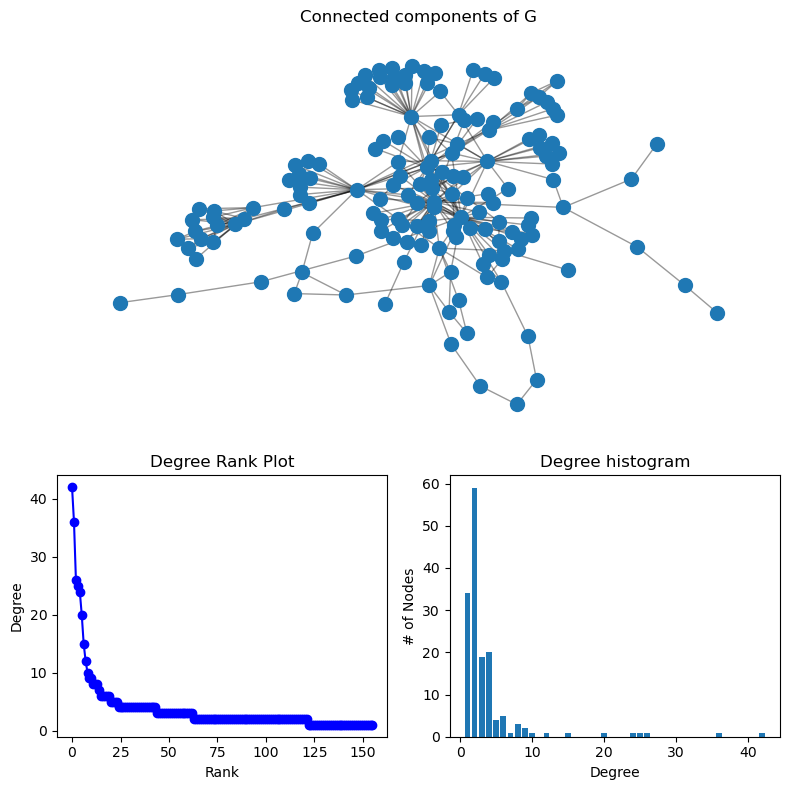

In [20]:
import numpy as np

G= Graph.to_undirected()
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=100, alpha=1)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()  # ASSIGNMENT---SO FAR MICRO PARAMETER

#### CORE COMMUNITY ANALYSIS

In [46]:
# CORE COMMUNITY SIZE
core_community = nx.k_core(Graph)
Core_community_size = len(core_community)
Core_community_size

7

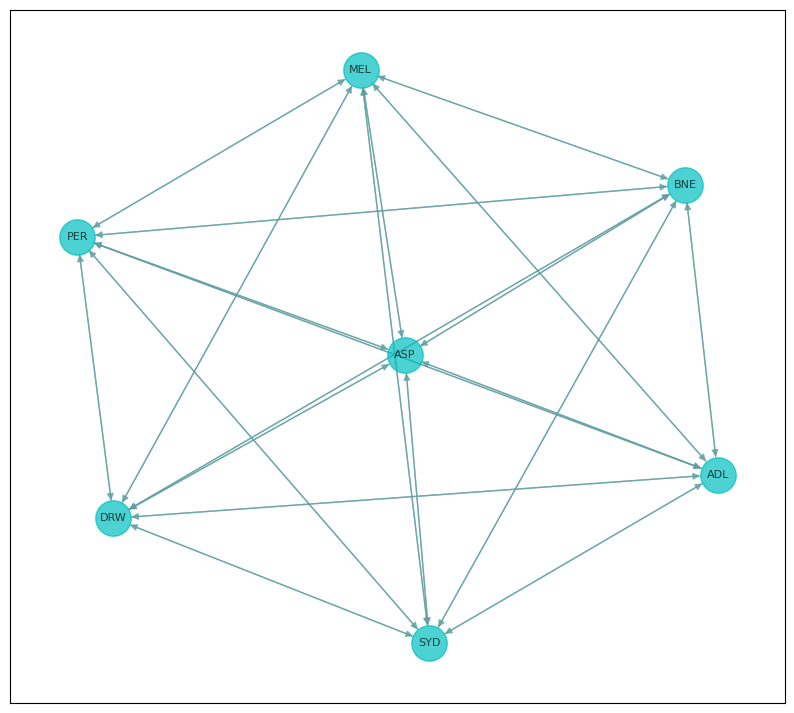

In [24]:
#CORE COMMUNITY PLOT
plt.figure(figsize = (10,9))
nx.draw_networkx(core_community,  node_size=650, edge_color='cadetblue', edge_cmap=cmap, node_color='c', font_size=8, alpha=0.7, width=1)
  
plt.show()

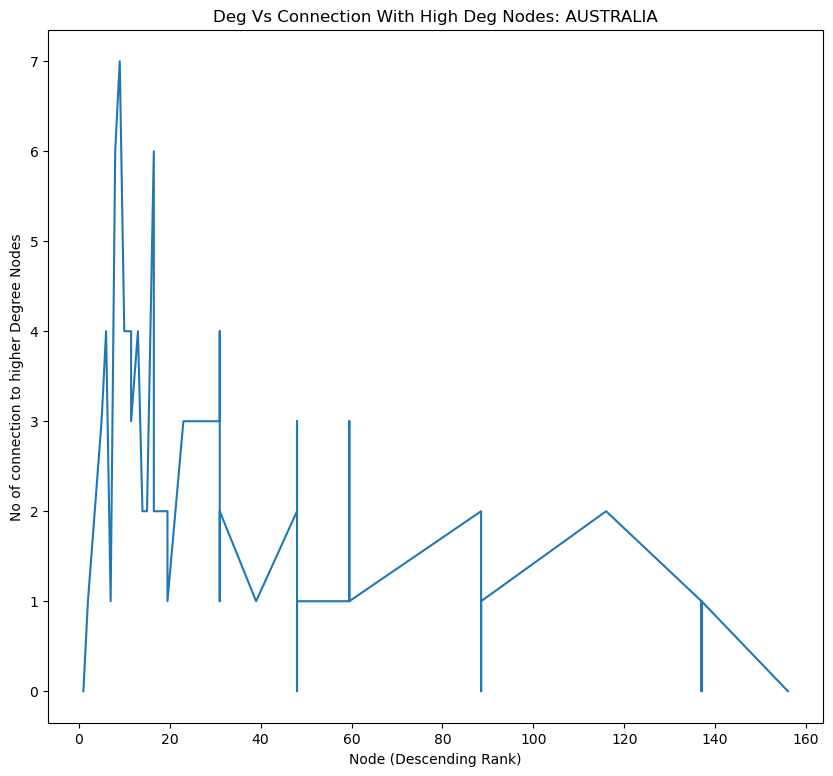

In [45]:
nodes_deg = pd.DataFrame([(node,val) for (node, val) in sorted(Graph.degree, key=lambda x: x[1], reverse=True)])    

nodes_deg = nodes_deg.rename({0: 'node',1:'degree'},axis = 1)
nodes_deg['rank'] = nodes_deg['degree'].rank(ascending=False)

hi_deg_ngbrs_list= []


for node in nodes_deg['node']:
    hi_deg_ngbrs = 0
    
    for n in Graph.neighbors(node):
         if nodes_deg[nodes_deg['node']== n].iloc[0]['degree'] > nodes_deg[nodes_deg['node']== node].iloc[0]['degree']:
            hi_deg_ngbrs+= 1
    
    hi_deg_ngbrs_list.append(hi_deg_ngbrs)
    

    
deg = sorted([d for n, d in Graph.degree], reverse=True)
deg_rank_axis = pd.DataFrame(deg).rank(ascending = False).values.tolist()

hi_deg_ngbrs_axis = hi_deg_ngbrs_list

plt.figure(figsize = (10,9))
plt.plot(deg_rank_axis,hi_deg_ngbrs_axis)
plt.title('Deg Vs Connection With High Deg Nodes: AUSTRALIA')
plt.xlabel('Node (Descending Rank)')
plt.ylabel('No of connection to higher Degree Nodes')
plt.xscale("linear")
plt.yscale("linear")

